# Opening a Bar in Paris Notebook

### Importing necessary libraries

In [54]:
import numpy as np 
import pandas as pd 
from geopy.geocoders import Nominatim 
import requests
import json
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### The data for the neighborhoods was obtained from wikipedia

In [2]:
paris = pd.read_html("https://es.wikipedia.org/wiki/Distritos_de_Par%C3%ADs")
paris=pd.DataFrame(paris[0])
paris

,Distrito,Nombre,Área (km²),Población (1999),Población (est. 2005),Densidad (2005) (hab/km²),Pico de población
0,I distrito (D),Louvre,1826,16 888,—,9 249 (1999),antes de 1861
1,II distrito (D),Bourse,0992,19 585,—,19 743 (1999),antes de 1861
2,III distrito (D),Temple,1171,34 248,—,29 247 (1999),antes de 1861
3,IV distrito (D),Hôtel-de-Ville,1601,30 675,—,19 160 (1999),antes de 1861
4,V distrito (I),Panthéon,2541,58 849,59 300,23 337,1911
5,VI distrito (I),Luxembourg,2154,44 919,45 800,21 263,1911
6,VII distrito (I),Palais-Bourbon,4088,56 985,55 700,13 625,1926
7,VIII distrito (D),Élysée,3881,39 314,39 200,10 100,1891
8,IX distrito (D),Opéra,2179,55 838,58 800,26 985,1901
9,X distrito (D),Enclos-St-Laurent,2892,89 612,89 600,30 982,1881


In [3]:
location=Nominatim(user_agent="neighbor")

### Obtaining the coordenates for the different districts in Paris.

In [4]:
lista_latitude=[]
lista_longitude=[]
for loc in paris["Nombre"]:
    lista_latitude.append(location.geocode(loc).latitude)
    lista_longitude.append(location.geocode(loc).longitude)
    

    

### Some coordenates were not correct so I made some corrections

In [5]:
#Temple
lista_latitude[2]=48.864027
lista_longitude[2]=2.361531
#Elysee
lista_latitude[7]=48.874167
lista_longitude[7]=2.311111
#pantheon
lista_latitude[4]=48.847222
lista_longitude[4]=2.344444
#Enclos
lista_latitude[9]=48.875508
lista_longitude[9]=2.357853
#Hotel de ville
lista_latitude[3]=48.855556
lista_longitude[3]=2.355556
#Luxembourg
lista_latitude[5]=48.850531
lista_longitude[5]=2.332233
#Reulliy
lista_latitude[11]=48.840808
lista_longitude[11]=2.388183
#Passy
lista_latitude[15]=48.863611
lista_longitude[15]=2.276489

In [6]:
paris["latitude"]=lista_latitude
paris["longitude"]=lista_longitude

In [7]:
paris

,Distrito,Nombre,Área (km²),Población (1999),Población (est. 2005),Densidad (2005) (hab/km²),Pico de población,latitude,longitude
0,I distrito (D),Louvre,1826,16 888,—,9 249 (1999),antes de 1861,48.861147,2.338028
1,II distrito (D),Bourse,0992,19 585,—,19 743 (1999),antes de 1861,48.868630,2.341474
2,III distrito (D),Temple,1171,34 248,—,29 247 (1999),antes de 1861,48.864027,2.361531
3,IV distrito (D),Hôtel-de-Ville,1601,30 675,—,19 160 (1999),antes de 1861,48.855556,2.355556
4,V distrito (I),Panthéon,2541,58 849,59 300,23 337,1911,48.847222,2.344444
5,VI distrito (I),Luxembourg,2154,44 919,45 800,21 263,1911,48.850531,2.332233
6,VII distrito (I),Palais-Bourbon,4088,56 985,55 700,13 625,1926,48.861596,2.317909
7,VIII distrito (D),Élysée,3881,39 314,39 200,10 100,1891,48.874167,2.311111
8,IX distrito (D),Opéra,2179,55 838,58 800,26 985,1901,48.876019,2.339962
9,X distrito (D),Enclos-St-Laurent,2892,89 612,89 600,30 982,1881,48.875508,2.357853


In [8]:
import folium

In [9]:
paris_lat=location.geocode("Paris").latitude
paris_long=location.geocode("Paris").longitude

### Map of the different districts in Paris.

In [10]:
# create map of Cologne using latitude and longitude 
map_paris = folium.Map(location=[paris_lat, paris_long], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(paris['latitude'], paris['longitude'], paris['Distrito']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris) 
    
map_paris

### Retrieving venue data from Foursquare

In [11]:
CLIENT_ID = 'EXTAEJK3LVIABWFE2AIB0BTRPTWBEUPFDM4FKHERNGO50I43' # your Foursquare ID
CLIENT_SECRET = 'BERMT3ZO522ZAPAKPQIKZTHXL3Q3PLECRCK3YF12NBZEWSIB' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 100 # limit of number of venues returned by Foursquare AP
radius = 500 # define radius

In [12]:
neighborhood_latitude=paris.loc[0,"latitude"]
neighborhood_longitude=paris.loc[0,"longitude"]

In [13]:

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '60ca200f3efa1124be4250b7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Paris',
  'headerFullLocation': 'Paris',
  'headerLocationGranularity': 'city',
  'totalResults': 56,
  'suggestedBounds': {'ne': {'lat': 48.8656473045, 'lng': 2.344855012527194},
   'sw': {'lat': 48.8566472955, 'lng': 2.331200361566126}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c079d740ed3c928b6be797d',
       'name': 'Cour Carrée du Louvre',
       'location': {'address': 'Rue de Rivoli',
        'crossStreet': 'Place du Louvre',
        'lat': 48.8603598795578,
        'lng': 2.3385429382324214,
        'labeledLatLngs': [{'label': 'display',
          'lat':

In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-15-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Cour Carrée du Louvre,Pedestrian Plaza,48.860360,2.338543
1,La Vénus de Milo (Vénus de Milo),Exhibit,48.859943,2.337234
2,Musée du Louvre,Art Museum,48.860847,2.336440
3,Palais Royal,Historic Site,48.863236,2.337127
4,Place du Palais Royal,Plaza,48.862523,2.336688


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
Paris_venues = getNearbyVenues(names=paris['Nombre'],
                                   latitudes=paris['latitude'],
                                   longitudes=paris['longitude']
                                  )

Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Élysée
Opéra
Enclos-St-Laurent
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Butte-Montmartre
Buttes-Chaumont
Ménilmontant


In [18]:
Paris_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.861147,2.338028,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
1,Louvre,48.861147,2.338028,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
2,Louvre,48.861147,2.338028,Musée du Louvre,48.860847,2.336440,Art Museum
3,Louvre,48.861147,2.338028,Palais Royal,48.863236,2.337127,Historic Site
4,Louvre,48.861147,2.338028,Place du Palais Royal,48.862523,2.336688,Plaza
...,...,...,...,...,...,...,...
1255,Ménilmontant,48.866708,2.383374,O'Connells Oberkampf,48.865928,2.378191,Irish Pub
1256,Ménilmontant,48.866708,2.383374,Hôtel Verlain,48.864985,2.377787,Hotel
1257,Ménilmontant,48.866708,2.383374,Restaurant du Lycée,48.863945,2.386686,Middle Eastern Restaurant
1258,Ménilmontant,48.866708,2.383374,sushi sweet,48.863151,2.386954,Japanese Restaurant


In [19]:
Paris_onehot = pd.get_dummies(Paris_venues[['Venue Category']], prefix="", prefix_sep="")
Paris_onehot['Neighborhood'] = Paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Paris_onehot.columns[-1]] + list(Paris_onehot.columns[:-1])
Paris_onehot = Paris_onehot[fixed_columns]

Paris_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Louvre,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Paris_grouped = Paris_onehot.groupby('Neighborhood').mean().reset_index()
Paris_grouped


,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Batignolles-Monceau,0.000000,0.000000,0.00,0.000000,0.024390,0.048780,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00
1,Bourse,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.01,0.000000,0.00,0.000000,0.000000,0.080000,0.010000,0.01,0.00
2,Butte-Montmartre,0.000000,0.000000,0.00,0.016667,0.000000,0.000000,0.000000,0.033333,0.00,...,0.000000,0.00,0.016667,0.00,0.000000,0.016667,0.016667,0.000000,0.00,0.00
3,Buttes-Chaumont,0.000000,0.000000,0.00,0.000000,0.000000,0.034483,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00
4,Enclos-St-Laurent,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,...,0.000000,0.00,0.020000,0.00,0.000000,0.010000,0.010000,0.010000,0.00,0.00
5,Gobelins,0.000000,0.019231,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.038462,0.000000,0.000000,0.00,0.00
6,Hôtel-de-Ville,0.000000,0.000000,0.00,0.000000,0.020000,0.010000,0.010000,0.000000,0.01,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.01,0.00
7,Louvre,0.000000,0.000000,0.00,0.000000,0.000000,0.053571,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00
8,Luxembourg,0.000000,0.017544,0.00,0.000000,0.017544,0.017544,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.017544,0.017544,0.00,0.00
9,Ménilmontant,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.017241,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.017241,0.017241,0.000000,0.00,0.00


In [21]:
Paris_grouped.shape

(20, 207)

### Getting the most common type of venues for each district/neighborhood

In [22]:
num_top_venues = 5

for hood in Paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Paris_grouped[Paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Batignolles-Monceau----
               venue  freq
0  French Restaurant  0.20
1              Hotel  0.07
2       Burger Joint  0.05
3         Art Museum  0.05
4        Supermarket  0.05


----Bourse----
                 venue  freq
0    French Restaurant  0.11
1             Wine Bar  0.08
2                Hotel  0.06
3  Japanese Restaurant  0.04
4         Cocktail Bar  0.03


----Butte-Montmartre----
                       venue  freq
0          French Restaurant  0.22
1                        Bar  0.13
2         Italian Restaurant  0.05
3  Middle Eastern Restaurant  0.03
4                Pizza Place  0.03


----Buttes-Chaumont----
                venue  freq
0   French Restaurant  0.24
1                Park  0.07
2  Italian Restaurant  0.07
3               Hotel  0.03
4          Soup Place  0.03


----Enclos-St-Laurent----
               venue  freq
0  French Restaurant  0.13
1              Hotel  0.05
2             Bistro  0.05
3        Pizza Place  0.04
4  Indian Restaurant  0.0

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Paris_grouped['Neighborhood']

for ind in np.arange(Paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Hotel,Supermarket,Burger Joint,Art Museum,Middle Eastern Restaurant,Boutique,Sporting Goods Shop,Café,Sandwich Place
1,Bourse,French Restaurant,Wine Bar,Hotel,Japanese Restaurant,Thai Restaurant,Salad Place,Cocktail Bar,Coffee Shop,Bakery,Italian Restaurant
2,Butte-Montmartre,French Restaurant,Bar,Italian Restaurant,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Plaza,Bistro,Asian Restaurant,Metro Station
3,Buttes-Chaumont,French Restaurant,Italian Restaurant,Park,Pool,Beer Garden,Grocery Store,Japanese Restaurant,Gas Station,Liquor Store,Plaza
4,Enclos-St-Laurent,French Restaurant,Bistro,Hotel,Pizza Place,Restaurant,Café,Indian Restaurant,Bakery,Japanese Restaurant,Italian Restaurant


### Selecting number of clusters K

In [102]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(Paris_grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(Paris_grouped_clustering, labels, metric = 'euclidean'))


AttributeError: 'list' object has no attribute 'len'

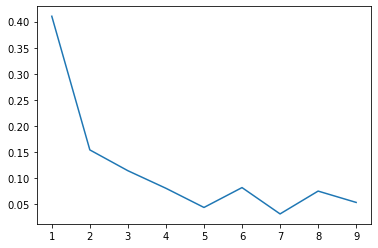

In [105]:
plt.plot(range(1,10),sil)


### The Silhouette analysis gives me an optimal of just 1 cluster which means it's better not to cluster at all, but for the sake of the project I will use an arbitrary number of clusters such as 5

In [85]:
# set number of clusters
kclusters = 5

Paris_grouped_clustering = Paris_grouped.drop('Neighborhood', 1)

# run k-means clustering



In [95]:
Paris_grouped_clustering.head()

,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,Bagel Shop,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.000000,0.02439,0.048780,0.0,0.000000,0.0,0.00,...,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.0
1,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.00,...,0.0,0.01,0.000000,0.0,0.0,0.000000,0.080000,0.01,0.01,0.0
2,0.0,0.0,0.0,0.016667,0.00000,0.000000,0.0,0.033333,0.0,0.00,...,0.0,0.00,0.016667,0.0,0.0,0.016667,0.016667,0.00,0.00,0.0
3,0.0,0.0,0.0,0.000000,0.00000,0.034483,0.0,0.000000,0.0,0.00,...,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.0
4,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.010000,0.0,0.01,...,0.0,0.00,0.020000,0.0,0.0,0.010000,0.010000,0.01,0.00,0.0


In [86]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 0, 0, 3, 3, 3, 3, 3, 2])

In [87]:
neighborhoods_venues_sorted.head(5)
neighborhoods_venues_sorted.drop("Cluster Labels",axis=1,inplace=True)
paris.head()


,Distrito,Neighborhood,Área (km²),Población (1999),Población (est. 2005),Densidad (2005) (hab/km²),Pico de población,latitude,longitude
0,I distrito (D),Louvre,1826,16 888,—,9 249 (1999),antes de 1861,48.861147,2.338028
1,II distrito (D),Bourse,0992,19 585,—,19 743 (1999),antes de 1861,48.868630,2.341474
2,III distrito (D),Temple,1171,34 248,—,29 247 (1999),antes de 1861,48.864027,2.361531
3,IV distrito (D),Hôtel-de-Ville,1601,30 675,—,19 160 (1999),antes de 1861,48.855556,2.355556
4,V distrito (I),Panthéon,2541,58 849,59 300,23 337,1911,48.847222,2.344444


In [88]:
paris.rename(columns={"Nombre":"Neighborhood"},inplace=True)
paris.head()

,Distrito,Neighborhood,Área (km²),Población (1999),Población (est. 2005),Densidad (2005) (hab/km²),Pico de población,latitude,longitude
0,I distrito (D),Louvre,1826,16 888,—,9 249 (1999),antes de 1861,48.861147,2.338028
1,II distrito (D),Bourse,0992,19 585,—,19 743 (1999),antes de 1861,48.868630,2.341474
2,III distrito (D),Temple,1171,34 248,—,29 247 (1999),antes de 1861,48.864027,2.361531
3,IV distrito (D),Hôtel-de-Ville,1601,30 675,—,19 160 (1999),antes de 1861,48.855556,2.355556
4,V distrito (I),Panthéon,2541,58 849,59 300,23 337,1911,48.847222,2.344444


In [89]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Paris_merged = paris

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Paris_merged = Paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Paris_merged.head() # check the last columns!

,Distrito,Neighborhood,Área (km²),Población (1999),Población (est. 2005),Densidad (2005) (hab/km²),Pico de población,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,I distrito (D),Louvre,1826,16 888,—,9 249 (1999),antes de 1861,48.861147,2.338028,3,French Restaurant,Plaza,Hotel,Café,Italian Restaurant,Art Museum,Garden,Furniture / Home Store,Park,Restaurant
1,II distrito (D),Bourse,0992,19 585,—,19 743 (1999),antes de 1861,48.868630,2.341474,3,French Restaurant,Wine Bar,Hotel,Japanese Restaurant,Thai Restaurant,Salad Place,Cocktail Bar,Coffee Shop,Bakery,Italian Restaurant
2,III distrito (D),Temple,1171,34 248,—,29 247 (1999),antes de 1861,48.864027,2.361531,3,French Restaurant,Hotel,Cocktail Bar,Chinese Restaurant,Vietnamese Restaurant,Art Gallery,Italian Restaurant,Supermarket,Sandwich Place,Seafood Restaurant
3,IV distrito (D),Hôtel-de-Ville,1601,30 675,—,19 160 (1999),antes de 1861,48.855556,2.355556,3,French Restaurant,Ice Cream Shop,Cosmetics Shop,Pastry Shop,Italian Restaurant,Coffee Shop,Hotel,Bar,Creperie,Bistro
4,V distrito (I),Panthéon,2541,58 849,59 300,23 337,1911,48.847222,2.344444,3,French Restaurant,Hotel,Bar,Italian Restaurant,Pub,Indie Movie Theater,Bakery,Coffee Shop,Plaza,Ice Cream Shop


# Analyzing the Clusters

## Cluster 0
### This cluster can be thought of as a Typical touristic cluster in which there are several hotels and french restaurants.

In [90]:
print(Paris_merged.loc[Paris_merged['Cluster Labels'] == 0, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]].shape)
Paris_merged.loc[Paris_merged['Cluster Labels'] == 0, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]]

(7, 16)


,Neighborhood,Densidad (2005) (hab/km²),Pico de población,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Palais-Bourbon,13 625,1926,48.861596,2.317909,0,French Restaurant,Plaza,Hotel,Food Truck,Beer Garden,Café,Italian Restaurant,Cultural Center,Convenience Store,Coffee Shop
7,Élysée,10 100,1891,48.874167,2.311111,0,French Restaurant,Hotel,Italian Restaurant,Bar,Bakery,Café,Hotel Bar,Supermarket,Japanese Restaurant,Salad Place
8,Opéra,26 985,1901,48.876019,2.339962,0,French Restaurant,Hotel,Japanese Restaurant,Wine Bar,Pizza Place,Vegetarian / Vegan Restaurant,Restaurant,Bistro,Dessert Shop,Bakery
15,Passy,18 7234,1962,48.863611,2.276489,0,French Restaurant,Bakery,Café,Hotel,Train Station,Supermarket,Sushi Restaurant,Sandwich Place,Garden,Seafood Restaurant
16,Batignolles-Monceau,28 277,1954,48.880292,2.308593,0,French Restaurant,Hotel,Supermarket,Burger Joint,Art Museum,Middle Eastern Restaurant,Boutique,Sporting Goods Shop,Café,Sandwich Place
17,Butte-Montmartre,31 391,1931,48.890012,2.346467,0,French Restaurant,Bar,Italian Restaurant,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Plaza,Bistro,Asian Restaurant,Metro Station
18,Buttes-Chaumont,27 321,20055,48.878396,2.381201,0,French Restaurant,Italian Restaurant,Park,Pool,Beer Garden,Grocery Store,Japanese Restaurant,Gas Station,Liquor Store,Plaza


## Cluster 1
### This Cluster is for toursists looking for an area where they can get some cheap food instead of only fancy restaurants.

In [91]:
print(Paris_merged.loc[Paris_merged['Cluster Labels'] == 1, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]].shape)
Paris_merged.loc[Paris_merged['Cluster Labels'] == 1, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]]

(1, 16)


,Neighborhood,Densidad (2005) (hab/km²),Pico de población,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Observatoire,23 875,1954,48.829567,2.323962,1,French Restaurant,Hotel,Bakery,Food & Drink Shop,Bistro,Sandwich Place,Tea Room,Thai Restaurant,Gym / Fitness Center,Cosmetics Shop


## Cluster 2
### This Cluster is a an area for people to have some drinks and party, there are a lot of bars and fast food. Basically a cluster to have a good time.

In [92]:
print(Paris_merged.loc[Paris_merged['Cluster Labels'] == 2, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]].shape)
Paris_merged.loc[Paris_merged['Cluster Labels'] == 2, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]]

(1, 16)


,Neighborhood,Densidad (2005) (hab/km²),Pico de población,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Ménilmontant,31 517,1936,48.866708,2.383374,2,Bar,Pizza Place,Cocktail Bar,Japanese Restaurant,Beer Bar,Italian Restaurant,Dessert Shop,Hotel,Burger Joint,Bookstore


## Cluster 3
### This cluster includes a lot of French Restaurants but is also combined with fast food such as ice creams and pizza restaurants. It's not a really fancy cluster such as the Cluster 0.

In [93]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 3, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]]

,Neighborhood,Densidad (2005) (hab/km²),Pico de población,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,9 249 (1999),antes de 1861,48.861147,2.338028,3,French Restaurant,Plaza,Hotel,Café,Italian Restaurant,Art Museum,Garden,Furniture / Home Store,Park,Restaurant
1,Bourse,19 743 (1999),antes de 1861,48.868630,2.341474,3,French Restaurant,Wine Bar,Hotel,Japanese Restaurant,Thai Restaurant,Salad Place,Cocktail Bar,Coffee Shop,Bakery,Italian Restaurant
2,Temple,29 247 (1999),antes de 1861,48.864027,2.361531,3,French Restaurant,Hotel,Cocktail Bar,Chinese Restaurant,Vietnamese Restaurant,Art Gallery,Italian Restaurant,Supermarket,Sandwich Place,Seafood Restaurant
3,Hôtel-de-Ville,19 160 (1999),antes de 1861,48.855556,2.355556,3,French Restaurant,Ice Cream Shop,Cosmetics Shop,Pastry Shop,Italian Restaurant,Coffee Shop,Hotel,Bar,Creperie,Bistro
4,Panthéon,23 337,1911,48.847222,2.344444,3,French Restaurant,Hotel,Bar,Italian Restaurant,Pub,Indie Movie Theater,Bakery,Coffee Shop,Plaza,Ice Cream Shop
5,Luxembourg,21 263,1911,48.850531,2.332233,3,Hotel,French Restaurant,Plaza,Italian Restaurant,Tea Room,Chocolate Shop,Bookstore,Seafood Restaurant,Garden,Café
9,Enclos-St-Laurent,30 982,1881,48.875508,2.357853,3,French Restaurant,Bistro,Hotel,Pizza Place,Restaurant,Café,Indian Restaurant,Bakery,Japanese Restaurant,Italian Restaurant
10,Popincourt,41 053,1911,48.858416,2.379703,3,Italian Restaurant,French Restaurant,Bar,Restaurant,Cocktail Bar,Bistro,Supermarket,Bakery,Theater,Pastry Shop
12,Gobelins,24 895,20055,48.832397,2.355583,3,Hotel,French Restaurant,Sandwich Place,Bar,Bakery,Vietnamese Restaurant,Café,Indian Restaurant,Japanese Restaurant,Italian Restaurant
14,Vaugirard,27 229,1962,48.841370,2.300383,3,French Restaurant,Italian Restaurant,Coffee Shop,Japanese Restaurant,Gym / Fitness Center,Park,Hotel,Lebanese Restaurant,Korean Restaurant,Gastropub


## Cluster 4
### This cluster is mostly about having all the necessary supplies for a tourist, which is why there are plenty supermarkets, bistro, hotels and coffee shops

In [94]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 4, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]]

,Neighborhood,Densidad (2005) (hab/km²),Pico de población,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Reuilly,21 813²,1962,48.840808,2.388183,4,Hotel,Bistro,Supermarket,Portuguese Restaurant,Doner Restaurant,Garden,Coffee Shop,Organic Grocery,Furniture / Home Store,Sushi Restaurant


### As we can see, the most appropiate cluster to open a bar in is Cluster 2